In [46]:
import copy
import os.path as osp
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.insert(0, "../src/")


In [47]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'

# This is the largest possible value of the logloss
logloss_inf_limit = -np.log(np.finfo('float').eps)


In [48]:
res_path = osp.join('..', 'output', 'real_data_20200906_140935', 'results.csv')  # only 3
res_path = osp.join('..', 'output', 'real_data_20200906_120919', 'results.csv') # all from aws cpu
res_path = osp.join('..', 'output', 'uci_experiment_20200909_160946', 'results.csv') 




res_df = pd.read_csv(res_path)
print(res_df.columns)
print('trainset_size= ',res_df.trainset_size.unique())


# Print avilable learners
learner_names = [col.replace('_test_logloss', '') for col in res_df.columns  if '_test_logloss' in col]
print('learner_names: ', learner_names)

res_df.head(5)

Index(['dataset_name', 'trainset_size', 'trail_num', 'valset_size',
       'testset_size', 'num_features', 'mn_test_logloss', 'mn_test_mse',
       'mn_theta_norm', 'mn_variance', 'genie_genie_adaptive_var_test_mse',
       'genie_genie_adaptive_var_test_logloss',
       'genie_genie_adaptive_var_theta_norm',
       'genie_genie_adaptive_var_variance', 'genie_mn_var_test_mse',
       'genie_mn_var_test_logloss', 'genie_mn_var_theta_norm',
       'genie_mn_var_variance', 'genie_genie_valset_mean_var_test_mse',
       'genie_genie_valset_mean_var_test_logloss',
       'genie_genie_valset_mean_var_theta_norm',
       'genie_genie_valset_mean_var_variance',
       'genie_genie_valset_median_var_test_mse',
       'genie_genie_valset_median_var_test_logloss',
       'genie_genie_valset_median_var_theta_norm',
       'genie_genie_valset_median_var_variance',
       'empirical_pnml_genie_adaptive_var_regret',
       'empirical_pnml_genie_adaptive_var_test_logloss',
       'empirical_pnml_genie

,dataset_name,trainset_size,trail_num,valset_size,testset_size,num_features,mn_test_logloss,mn_test_mse,mn_theta_norm,mn_variance,...,empirical_pnml_pnml_adaptive_var_test_logloss,empirical_pnml_pnml_adaptive_var_variance,analytical_pnml_regret,analytical_pnml_test_logloss,mdl_lambda_opt,mdl_test_mse,mdl_theta_norm,mdl_test_logloss,mdl_variance,test_idx
0,UCI_Datasets/bostonHousing/,2,0,46,51,14,5.159284,520.356334,0.007932,149.938441,...,4.373150,0.208069,3.428783,6.853244,[36683.69426447],9.230990,0.002426,3.456545,150.48631,0
1,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.425282,0.369054,0.007932,149.938441,...,0.907294,0.000077,1.423218,4.847269,[36683.69426447],36.627103,0.002426,3.547570,150.48631,1
2,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.452857,8.638121,0.007932,149.938441,...,2.268966,0.001507,2.576313,6.000366,[36683.69426447],125.262525,0.002426,3.842067,150.48631,2
3,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.453162,8.729692,0.007932,149.938441,...,2.062485,0.878853,0.584455,4.010339,[36683.69426447],0.002764,0.002426,3.425884,150.48631,3
4,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.735780,93.480419,0.007932,149.938441,...,3.664283,45.641296,0.580762,4.140847,[36683.69426447],178.348793,0.002426,4.018449,150.48631,4


In [49]:
# List learners
var_types = []
for col in res_df.columns:
    if col.startswith('empirical_pnml_') and col.endswith('_regret'):
        var_type = col.replace('empirical_pnml_','').replace('_regret','')
        var_types.append(var_type)
print(var_types)

['genie_adaptive_var', 'mn_var', 'genie_valset_mean_var', 'genie_valset_median_var', 'pnml_valset_mean_var', 'pnml_valset_median_var', 'pnml_adaptive_var']


In [50]:
res_df

,dataset_name,trainset_size,trail_num,valset_size,testset_size,num_features,mn_test_logloss,mn_test_mse,mn_theta_norm,mn_variance,...,empirical_pnml_pnml_adaptive_var_test_logloss,empirical_pnml_pnml_adaptive_var_variance,analytical_pnml_regret,analytical_pnml_test_logloss,mdl_lambda_opt,mdl_test_mse,mdl_theta_norm,mdl_test_logloss,mdl_variance,test_idx
0,UCI_Datasets/bostonHousing/,2,0,46,51,14,5.159284,520.356334,0.007932,149.938441,...,4.373150,0.208069,3.428783,6.853244,[36683.69426447],9.230990,0.002426,3.456545,150.486310,0
1,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.425282,0.369054,0.007932,149.938441,...,0.907294,0.000077,1.423218,4.847269,[36683.69426447],36.627103,0.002426,3.547570,150.486310,1
2,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.452857,8.638121,0.007932,149.938441,...,2.268966,0.001507,2.576313,6.000366,[36683.69426447],125.262525,0.002426,3.842067,150.486310,2
3,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.453162,8.729692,0.007932,149.938441,...,2.062485,0.878853,0.584455,4.010339,[36683.69426447],0.002764,0.002426,3.425884,150.486310,3
4,UCI_Datasets/bostonHousing/,2,0,46,51,14,3.735780,93.480419,0.007932,149.938441,...,3.664283,45.641296,0.580762,4.140847,[36683.69426447],178.348793,0.002426,4.018449,150.486310,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,UCI_Datasets/bostonHousing/,409,2,46,51,14,2.901151,19.094145,1905.025056,16.131992,...,2.894115,18.332065,0.030159,2.896668,[20.81778448],19.916307,35.442318,2.917294,18.020711,46
4433,UCI_Datasets/bostonHousing/,409,2,46,51,14,2.725886,13.439404,1905.025056,16.131992,...,2.718481,12.823623,0.030976,2.731839,[20.81778448],5.240823,35.442318,2.510110,18.020711,47
4434,UCI_Datasets/bostonHousing/,409,2,46,51,14,2.309363,0.000730,1905.025056,16.131992,...,-2.191753,0.000666,0.047591,2.356952,[20.81778448],0.021065,35.442318,2.365284,18.020711,48
4435,UCI_Datasets/bostonHousing/,409,2,46,51,14,2.318167,0.284757,1905.025056,16.131992,...,0.791269,0.264522,0.036036,2.353589,[20.81778448],1.831868,35.442318,2.415526,18.020711,49


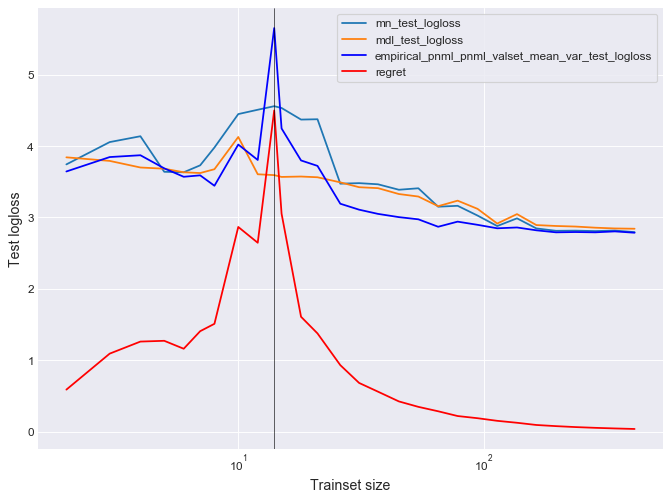

In [53]:
#
var_types = [
#     'genie_valset_mean_var', 
#     'genie_adaptive_var', 
#     'mn_var', 
#     'genie_valset_median_var', 
    'pnml_valset_mean_var', 
#     'pnml_valset_median_var', 
#     'pnml_adaptive_var'
]

# Create mean df
res_mean_df = res_df.groupby('trainset_size').mean().reset_index()
res_std_df = res_df.groupby('trainset_size').std().reset_index()

# Plot learners logloss
keys = ['mn_test_logloss',      'mdl_test_logloss']
genie_keys = [f'genie_{var_type}_test_logloss' for var_type in var_types]
pnml_keys = [f'empirical_pnml_{var_type}_test_logloss' for var_type in var_types]

fig,ax = plt.subplots(1,1,figsize=(8,6))
colors = ['b','g','r','c','m','y','k','w']
for i,key in enumerate(keys):
    ax.plot(res_mean_df['trainset_size'],res_mean_df[key], label=key)
for i,var_type in enumerate(var_types):
    genie_key, pnml_key = f'genie_{var_type}_test_logloss', f'empirical_pnml_{var_type}_test_logloss'
    if genie_key in res_mean_df:
        ax.plot(res_mean_df['trainset_size'],res_mean_df[genie_key], '--', label=genie_key, color=colors[i])
    ax.plot(res_mean_df['trainset_size'],res_mean_df[pnml_key] , label=pnml_key,color=colors[i])
ax.plot(res_mean_df['trainset_size'],res_mean_df['empirical_pnml_pnml_valset_mean_var_regret'] , label='regret',color='r')
ax.axvline(res_mean_df['num_features'].mean(), color='black', linewidth=0.5)
ax.legend(loc=1)
ax.set_ylabel('Test logloss')
ax.set_xlabel('Trainset size')

plt.xscale('log')
# plt.yscale('symlog')
plt.tight_layout()
plt.show()


In [52]:
# Choose specific configurations
dataset_name = '645_fri_c3_500_50'
print('trainset_size: ', res_mean_df.trainset_size.unique())
trainset_size = 4
trail_num = 0
df = res_df[(res_df['dataset_name'] == dataset_name) & \
            (res_df['trainset_size'] == trainset_size) & \
            (res_df['trail_num'] == trail_num)
            ]
df.head(5)

trainset_size:  [  2   3   4   5   6   7   8  10  12  14  15  18  21  26  31  37  45  54
  65  78  94 113 136 163 196 235 283 340 409]


,dataset_name,trainset_size,trail_num,valset_size,testset_size,num_features,mn_test_logloss,mn_test_mse,mn_theta_norm,mn_variance,...,empirical_pnml_pnml_adaptive_var_test_logloss,empirical_pnml_pnml_adaptive_var_variance,analytical_pnml_regret,analytical_pnml_test_logloss,mdl_lambda_opt,mdl_test_mse,mdl_theta_norm,mdl_test_logloss,mdl_variance,test_idx


In [14]:
# Plot learners logloss for each sample
df_sorted = df.sort_values(by=['mn_test_logloss'])
df_sorted = df_sorted.reset_index()
keys = ['mn',
        'empirical_pnml',
#         'analytical_pnml',
        'mdl',
        'genie']
for key in keys:
    plt.plot(df_sorted[key + '_test_logloss'], '*', label=key)   
plt.legend()
plt.title('{}: trainset size={}'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Test logloss')
# plt.xscale('log')
plt.tight_layout()
plt.show()

# Worst case:
print('Worst case:')
print(df_sorted[[key + '_test_logloss' for key in keys]].max())

KeyError: 'empirical_pnml_test_logloss'

KeyError: 'genie_theta_norm'

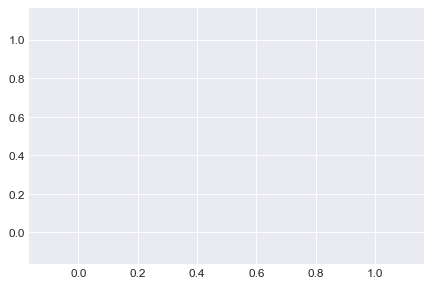

In [15]:
# Plot learners logloss for each sample
df_sorted = df.sort_values(by=['mn_test_logloss'])
df_sorted = df_sorted.reset_index()
keys = ['mn',
        'mdl',
        'genie']

alpha = 1.0
for key in keys:
    plt.plot(df_sorted[key + '_theta_norm'], '*', label=key,alpha=alpha)
    alpha -=0.2
plt.legend()
plt.title('{}: trainset size={}'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Learner Norm')
# plt.xscale('log')
plt.tight_layout()
plt.show()


In [16]:
# Variance
# Plot learners logloss for each sample
df_sorted = df.sort_values(by=['mn_test_logloss'])
df_sorted = df_sorted.reset_index()
keys = [
# ['mn',
#         'mn_adaptive_var',
#         'mdl',
#         'mdl_adaptive_var',
#         'genie',
#         'genie_valset_var',
        'genie_adaptive_var',
    'best_pnml_var']
# for key in keys:
#     plt.plot(df_sorted[key + '_variance'], '*', label=key)
# plt.plot(df_sorted['empirical_pnml_regret'], label='regret')
#     'mn_var_var',
#              'empirical_pnml_valset_mean_var',
#              'empirical_pnml_valset_median_var',
#     'adaptive_var_var'

plt.plot(df_sorted['genie_mn_var_var_variance'] , label='valset mn var')
plt.plot(df_sorted['genie_adaptive_var_var_variance'] , label='adaptive_var')
plt.legend()
plt.title('{}: trainset size={}. Sorted by the test logloss'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Adaptive var')
plt.yscale('log')
plt.tight_layout()
plt.show()

KeyError: 'genie_mn_var_var_variance'

In [17]:
# Variance
# Plot learners logloss for each sample
df_sorted = df.sort_values(by=['mn_test_logloss'])
df_sorted = df_sorted.reset_index()
keys = [f'genie_{var_type}_variance' for var_type in var_types]
for key in keys:
    plt.plot(df_sorted[key] , label=key)
plt.legend()
plt.title('{}: trainset size={}. Sorted by the test logloss'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Adaptive var')
plt.yscale('log')
plt.tight_layout()
plt.show()

KeyError: 'genie_pnml_valset_mean_var_variance'

In [18]:
df_sorted[[key for key in df_sorted.columns if 'variance' in key]].mean()

mn_variance                                       NaN
genie_genie_adaptive_var_variance                 NaN
genie_mn_var_variance                             NaN
genie_genie_valset_mean_var_variance              NaN
genie_genie_valset_median_var_variance            NaN
empirical_pnml_genie_adaptive_var_variance        NaN
empirical_pnml_mn_var_variance                    NaN
empirical_pnml_genie_valset_mean_var_variance     NaN
empirical_pnml_genie_valset_median_var_variance   NaN
empirical_pnml_pnml_valset_mean_var_variance      NaN
empirical_pnml_pnml_valset_median_var_variance    NaN
empirical_pnml_pnml_adaptive_var_variance         NaN
mdl_variance                                      NaN
dtype: float64

In [19]:
df_sorted['genie_valset_var_variance']

KeyError: 'genie_valset_var_variance'